# Regularization in TensorFlow

<!--<badge>--><a href="https://colab.research.google.com/github/TheAIDojo/AI_4_Climate_Bootcamp/blob/main/Week 02 - Optimization and Regularization/Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a><!--</badge>-->

Regularization is a technique used to prevent overfitting in deep learning models. Overfitting occurs when a model is trained too well on the training data and performs poorly on unseen data. Regularization helps to reduce the complexity of the model and make it more generalizable to new data.



## Table of Contents <a name="toc"></a>
* [Preparing the Example](#prep)
* [Dropout](#dropout)
* [Early Stopping](#early-stopping)


## Preparing the Example <a name="prep"></a>
[Back to Top](#toc)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
# Load and preprocess the data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train.shape, y_train.shape, x_test.shape, y_train.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (60000,))

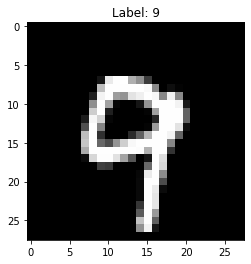

In [3]:
# Pick a random image index
index = np.random.randint(0, x_train.shape[0])

# Plot the image
plt.imshow(x_train[index], cmap="gray")
plt.title("Label: " + str(y_train[index]))
plt.show()

In [4]:
# reshape the data to be in the format (batch_size, input_dim) because Dense layers require one dimensional input
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

x_train.shape, x_test.shape

((60000, 784), (10000, 784))

In [5]:
# Normalize the data
x_train = x_train / 255.0
x_test = x_test / 255.0

In [6]:
# convert the labels from integers to categorical using one hot encoding
depth = len(set(y_train))  # calculate the number of classes to use as depth
y_train = tf.one_hot(y_train, depth=depth)
y_test = tf.one_hot(y_test, depth=depth)

y_train.shape, y_test.shape

(TensorShape([60000, 10]), TensorShape([10000, 10]))

## Dropout <a name="dropout"></a>
[Back to Top](#toc)

Dropout is a regularization technique that helps to prevent overfitting in deep learning models. It works by randomly "dropping out" or ignoring a subset of neurons during training. This is done by setting a probability, usually between 0 and 1, for each neuron to be dropped out.

When dropout is applied, each neuron in the network has a probability of p of being "dropped out" during training. This means that for each training iteration, the neuron will not be used to make any computations or contribute to the final output. By dropping out neurons at random during training, the model is forced to learn to rely on multiple neurons rather than just a few specific ones. This makes the model more robust to noise in the data and less reliant on any one neuron.

Dropout can be applied to any layer of a neural network, but it is most commonly applied to the fully connected layers. In TensorFlow, dropout can be easily applied to a layer using the `tf.keras.layers.Dropout` layer, where you can specify the dropout rate(probability) as a parameter.

Here is an example of how to apply dropout to a dense layer in TensorFlow:

```
model = tf.keras.Sequential([
  ...
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dropout(rate=0.2)
  ...
])
```
This will apply a dropout rate of 0.2 (20%) to the dense layer, meaning that 20% of the neurons in this layer will be dropped out during training. It's worth noting that the dropout is only used during training time, during the inference time all neurons are used.





In [7]:
# fetch the input shape, i.e. the number of features
input_shape = x_train.shape[1]  # input_shape = 784

model = tf.keras.Sequential(
    [
        # input layer
        tf.keras.layers.Input(shape=(input_shape)),
        # hidden layers
        tf.keras.layers.Dense(256, activation="relu"),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dropout(0.3),
        # output layer
        tf.keras.layers.Dense(10, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [8]:
loss_fn = tf.losses.CategoricalCrossentropy()
optimizer = tf.optimizers.Adam(learning_rate=0.001)
metrics = [tf.keras.metrics.CategoricalAccuracy()]

# Compile the model
model.compile(optimizer=optimizer, loss=loss_fn, metrics=metrics)

In [9]:
model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 19s 9ms/step - loss: 0.2759 - categorical_accuracy: 0.9169 - val_loss: 0.1205 - val_categorical_accuracy: 0.9630
Epoch 2/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1293 - categorical_accuracy: 0.9611 - val_loss: 0.0920 - val_categorical_accuracy: 0.9720
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0977 - categorical_accuracy: 0.9705 - val_loss: 0.0913 - val_categorical_accuracy: 0.9728
Epoch 4/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0832 - categorical_accuracy: 0.9743 - val_loss: 0.0771 - val_categorical_accuracy: 0.9766
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0707 - categorical_accuracy: 0.9780 - val_loss: 0.0686 - val_categorical_accuracy: 0.9800
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0647 - categorical_accuracy: 0.9796 - val_loss: 0.0728 - val_categorical_accur

## Early Stopping <a name="early-stopping"></a>
[Back to Top](#toc)

Early stopping is a regularization technique used to prevent overfitting in deep learning models. The idea behind early stopping is to monitor the performance of the model on a validation set during training, and stop the training process when the performance starts to degrade.

The validation set is a set of data that is used to evaluate the model's performance during training. The performance is typically measured by a metric such as accuracy or loss. The validation set is used to ensure that the model is generalizing well to new data, and not just memorizing the training data.

During training, the performance of the model on the validation set is monitored at regular intervals (for example, after every epoch). If the performance of the model on the validation set stops improving for a certain number of consecutive iterations (for example, after several epochs), the training process is stopped. This helps to prevent the model from overfitting by stopping the training process before the model reaches its maximum number of training iterations.

In TensorFlow, early stopping can be implemented by setting a `tf.keras.callbacks.EarlyStopping` callback during the training process, which monitors the performance of the model on a validation set and stops the training process when the performance stops improving. You can specify the metric to monitor, the number of iterations to wait before stopping the training, and whether to restore the weights of the best performing model.

Here is an example of how to use early stopping in TensorFlow:

```
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
model.fit(x_train, y_train, batch_size=32, epochs=100, validation_data=(x_test, y_test), callbacks=[es])
```

In this example, we used a `tf.keras.callbacks.EarlyStopping` callback to monitor the validation loss, we set the patience to 5, that means the training will stop if the validation loss stop improving after 5 epochs.

Early stopping is a simple yet effective regularization technique that can be used to prevent overfitting in deep learning models. It helps to ensure that the model is generalizing well to new data and not just memorizing the training data, by stopping the training process when the performance on the validation set starts to degrade.





In [10]:
# fetch the input shape, i.e. the number of features
input_shape = x_train.shape[1]  # input_shape = 784

model = tf.keras.Sequential(
    [
        # input layer
        tf.keras.layers.Input(shape=(input_shape)),
        # hidden layers
        tf.keras.layers.Dense(256, activation="relu"),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dropout(0.3),
        # output layer
        tf.keras.layers.Dense(10, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 256)               200960    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [11]:
loss_fn = tf.losses.CategoricalCrossentropy()
optimizer = tf.optimizers.Adam(learning_rate=0.001)
metrics = [tf.keras.metrics.CategoricalAccuracy()]

# Compile the model
model.compile(optimizer=optimizer, loss=loss_fn, metrics=metrics)

In [12]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss", patience=3, mode="min"
)

model.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=20,
    validation_data=(x_test, y_test),
    callbacks=[early_stopping],
)

Epoch 1/20
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2709 - categorical_accuracy: 0.9184 - val_loss: 0.1101 - val_categorical_accuracy: 0.9660
Epoch 2/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1252 - categorical_accuracy: 0.9618 - val_loss: 0.0966 - val_categorical_accuracy: 0.9698
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0989 - categorical_accuracy: 0.9697 - val_loss: 0.0728 - val_categorical_accuracy: 0.9785
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0801 - categorical_accuracy: 0.9748 - val_loss: 0.0776 - val_categorical_accuracy: 0.9776
Epoch 5/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0698 - categorical_accuracy: 0.9782 - val_loss: 0.0710 - val_categorical_accuracy: 0.9777
Epoch 6/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0613 - categorical_accuracy: 0.9808 - val_loss: 0.0743 - val_categorical_accuracy: